In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
from torch.utils.data import Dataset, DataLoader
from torch import nn
from torch.nn.functional import relu
from scipy.io import loadmat
import os
from os import listdir
import pandas as pd
from skimage import io
from PIL import Image
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pickle
from random import sample

from utils import *

In [41]:
%cd /home/bijanadmin/Desktop/Goose_data/

/home/bijanadmin/Desktop/Goose_data


In [42]:
os.listdir('/home/bijanadmin/Desktop/Goose_data/')

['data_Goose_all_2',
 'data_Goose_1st_5s_1',
 'data_Goose_1st_5s_2',
 'data_Goose_1st_15s_2',
 'data_Goose_all_15s_2',
 'model',
 'figures',
 'data_Goose_all_5s_2',
 'data_Goose_1st_2',
 'loss_accuracy',
 'data_Goose_1st_15s_1']

In [43]:
#selected subset of dates. 
val_dates = ['180409','180412','180414']
test_dates = ['180411', '180413']
bad_dates = ['180326', '180328', '171019', '180715', '180716', '180717']
load_path = '/home/bijanadmin/Desktop/Goose_data/data_Goose_all_2/'
model_saving_path = '/mnt/pesaranlab/People/Capstone_students/Yue/model/model_Goose_all_2_upsample'

train_files, val_files, test_files = create_files(load_path, val_dates, test_dates, bad_dates)
train_loader, val_loader, test_loader = create_dataloaders(train_files, val_files, test_files,load_path, batch_size=256)

In [44]:
# Balance Validation Dataset
sleep_files = []
move_files = []
for t in range(len(val_files)):
    if 'sleep' in val_files[t][0]:
        sleep_files.append(val_files[t])
    if 'move' in val_files[t][0]:
        move_files.append(val_files[t])

sleep_sample = sample(sleep_files, len(move_files))
val_2_files = sleep_sample+move_files
train_loader, val_loader, test_loader = create_dataloaders(train_files, val_2_files, test_files,load_path, batch_size=256)

## Check balance
# count_sleep = 0
# count_move = 0
# for t in range(len(val_2_files)):
#     if 'sleep' in val_2_files[t][0]:
#         count_sleep+=1
#     if 'move' in val_2_files[t][0]:
#         count_move +=1 
# print(count_sleep, count_move)

In [45]:
len(train_loader), len(val_loader), len(test_loader)

(173, 9, 24)

In [46]:
for batch_idx, (data, label, date, rec, time) in enumerate(train_loader): # check shapes
    print(data.shape)
    print(label.shape)
    print(len(date))
    print(len(rec))
    print(len(time))
    break

torch.Size([256, 62, 100, 10])
torch.Size([256, 1])
256
256
256


date:180325, rec:001, time:3950.0


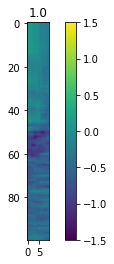

date:180330, rec:008, time:5745.0


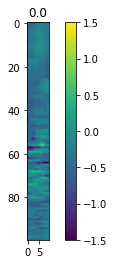

date:180327, rec:004, time:2474.0


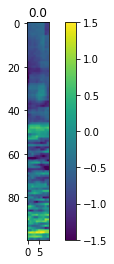

date:180330, rec:008, time:2616.0


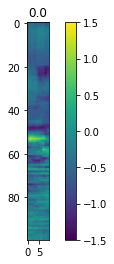

date:180325, rec:006, time:4135.0


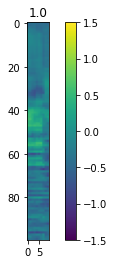

date:180331, rec:006, time:5239.0


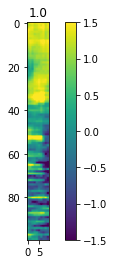

date:180327, rec:007, time:3420.0


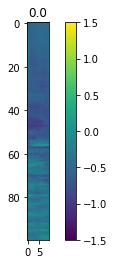

date:180327, rec:008, time:6479.0


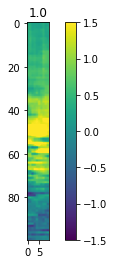

date:180410, rec:006, time:1886.0


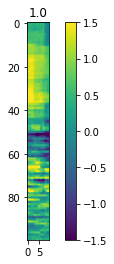

date:180331, rec:007, time:2267.0


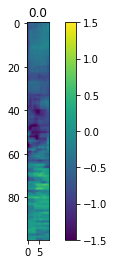

date:180327, rec:005, time:1763.0


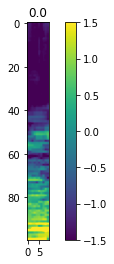

date:180324, rec:008, time:2231.0


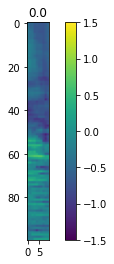

date:180330, rec:009, time:4451.0


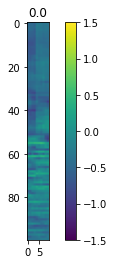

date:180330, rec:005, time:5992.0


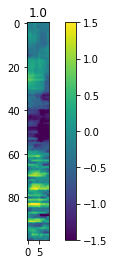

date:180331, rec:004, time:5637.0


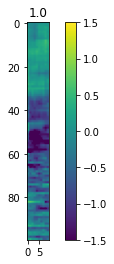

date:180401, rec:001, time:5197.0


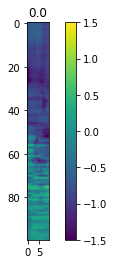

date:180325, rec:004, time:5356.0


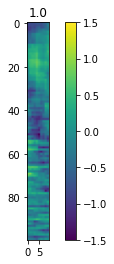

date:180325, rec:007, time:2836.0


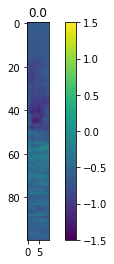

date:180330, rec:003, time:4384.0


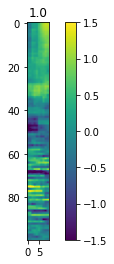

date:180327, rec:008, time:2912.0


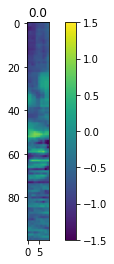

date:180325, rec:002, time:4438.0


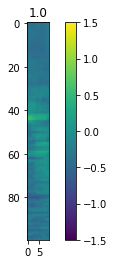

date:180327, rec:006, time:4618.0


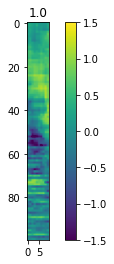

date:180327, rec:005, time:6048.0


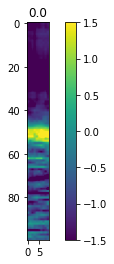

date:180401, rec:001, time:6213.0


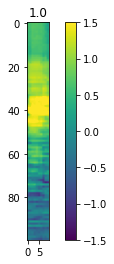

date:180331, rec:005, time:6498.0


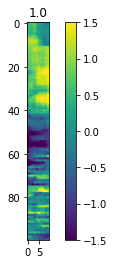

date:180325, rec:004, time:713.0


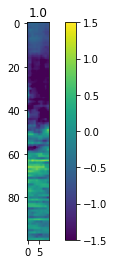

date:180325, rec:009, time:3746.0


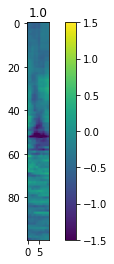

date:180322, rec:007, time:4100.0


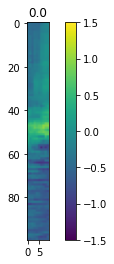

date:180324, rec:008, time:4729.0


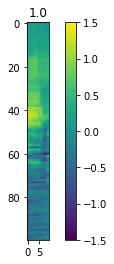

date:180330, rec:009, time:6971.0


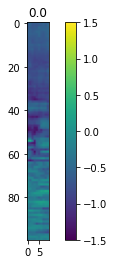

date:180325, rec:007, time:880.0


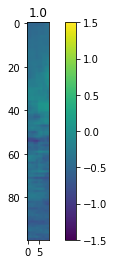

date:180325, rec:003, time:2415.0


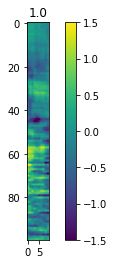

date:180330, rec:009, time:1624.0


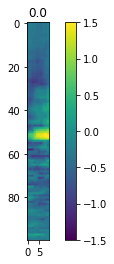

date:180327, rec:007, time:2270.0


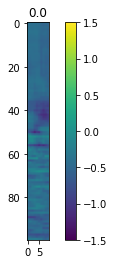

date:180331, rec:003, time:3618.0


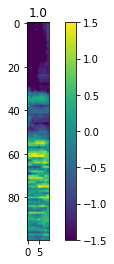

date:180329, rec:003, time:2514.0


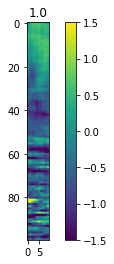

date:180410, rec:005, time:1598.0


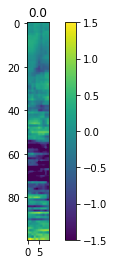

date:180323, rec:002, time:650.0


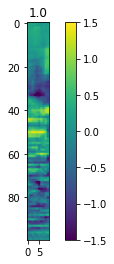

date:180330, rec:005, time:512.0


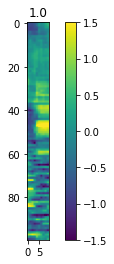

date:180327, rec:008, time:530.0


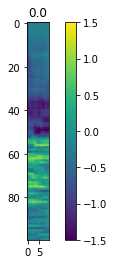

date:180325, rec:009, time:1090.0


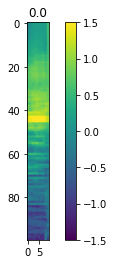

date:180330, rec:008, time:6185.0


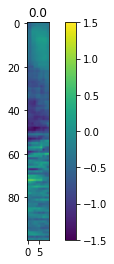

date:180331, rec:006, time:4938.0


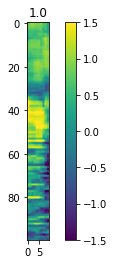

date:180325, rec:009, time:160.0


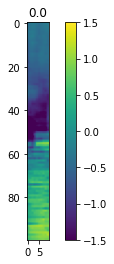

date:180327, rec:001, time:580.0


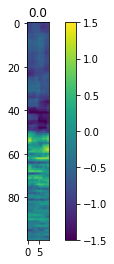

date:180331, rec:001, time:2932.0


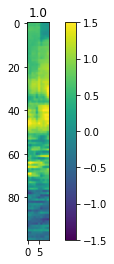

date:180324, rec:009, time:110.0


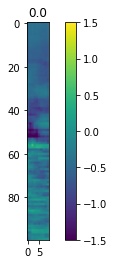

date:180325, rec:005, time:6523.0


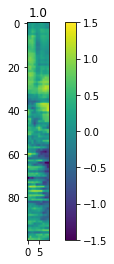

date:180325, rec:002, time:4788.0


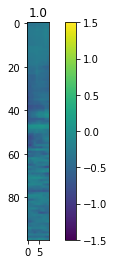

date:180327, rec:008, time:1912.0


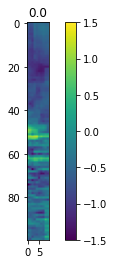

date:180322, rec:007, time:3499.0


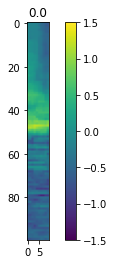

date:180329, rec:002, time:876.0


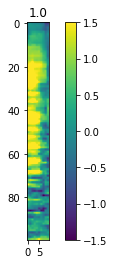

date:180323, rec:002, time:3106.0


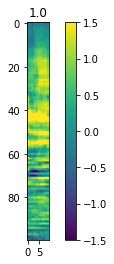

date:180324, rec:004, time:3614.0


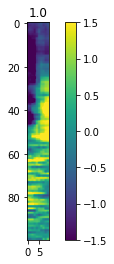

date:180322, rec:005, time:2801.0


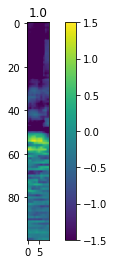

date:180327, rec:004, time:6243.0


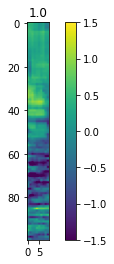

date:180330, rec:009, time:2104.0


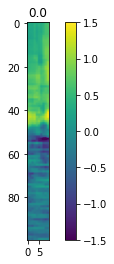

date:180329, rec:003, time:5786.0


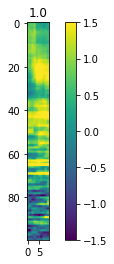

date:180322, rec:003, time:2858.0


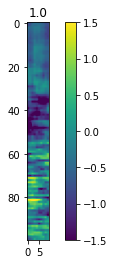

date:180325, rec:004, time:6087.0


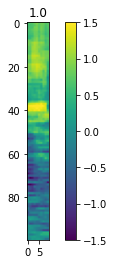

date:180323, rec:002, time:40.0


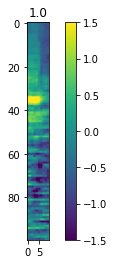

date:180324, rec:006, time:5813.0


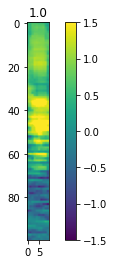

date:180327, rec:007, time:6631.0


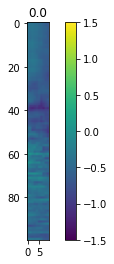

date:180330, rec:008, time:6645.0


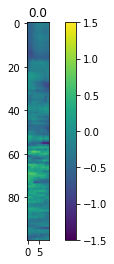

date:180331, rec:003, time:3598.0


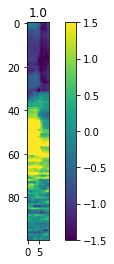

date:180330, rec:005, time:3615.0


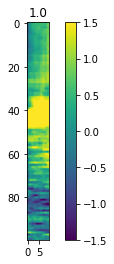

date:180410, rec:005, time:5507.0


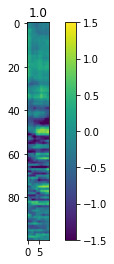

date:180329, rec:001, time:4932.0


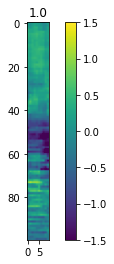

date:180330, rec:008, time:5565.0


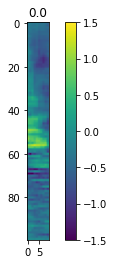

date:180327, rec:006, time:160.0


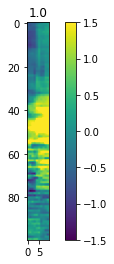

date:180331, rec:001, time:930.0


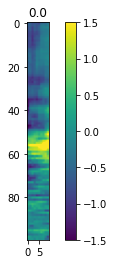

date:180327, rec:001, time:5154.0


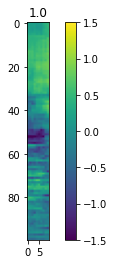

date:180327, rec:008, time:5853.0


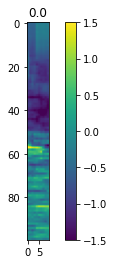

date:180327, rec:007, time:3060.0


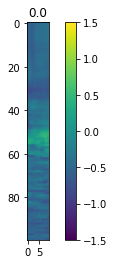

date:180327, rec:001, time:2745.0


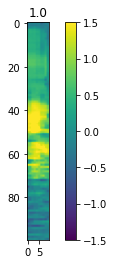

date:180330, rec:008, time:4527.0


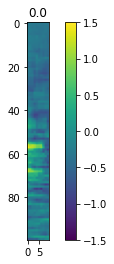

date:180327, rec:005, time:1370.0


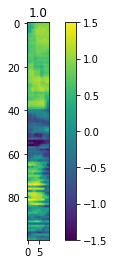

date:180329, rec:003, time:2676.0


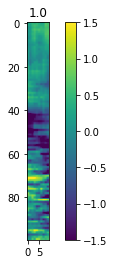

date:180330, rec:009, time:558.0


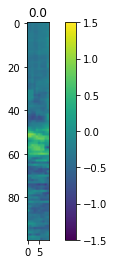

date:180330, rec:008, time:2646.0


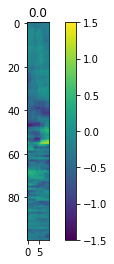

date:180331, rec:003, time:3688.0


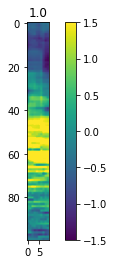

date:180327, rec:001, time:1680.0


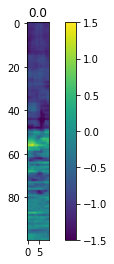

date:180401, rec:001, time:1290.0


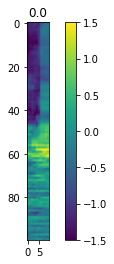

date:180330, rec:001, time:5639.0


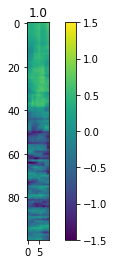

date:180325, rec:004, time:2348.0


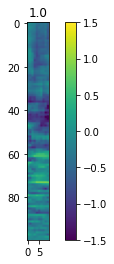

date:180330, rec:008, time:991.0


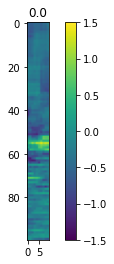

date:180325, rec:003, time:2735.0


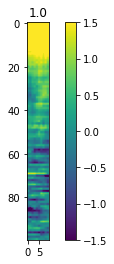

date:180331, rec:007, time:5948.0


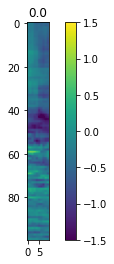

date:180323, rec:007, time:2985.0


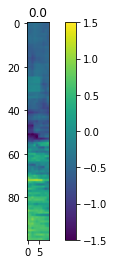

date:180327, rec:008, time:5713.0


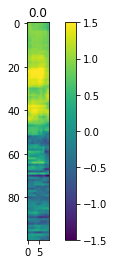

date:180324, rec:008, time:2838.0


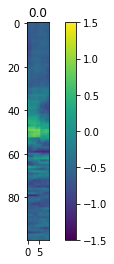

date:180327, rec:001, time:2220.0


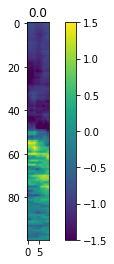

date:180410, rec:003, time:3310.0


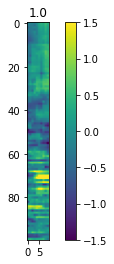

date:180325, rec:007, time:5113.0


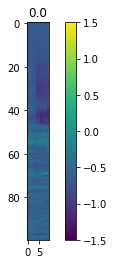

date:180327, rec:005, time:1060.0


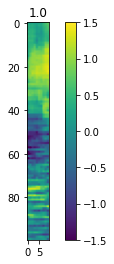

date:180323, rec:007, time:2259.0


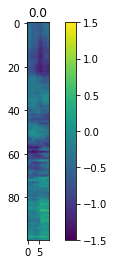

date:180330, rec:008, time:7065.0


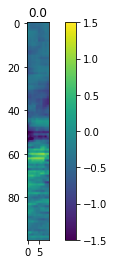

date:180330, rec:008, time:271.0


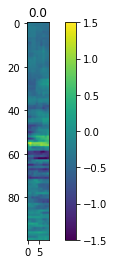

date:180327, rec:002, time:4263.0


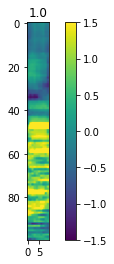

date:180331, rec:001, time:1210.0


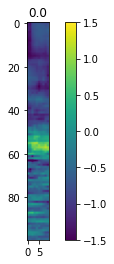

date:180324, rec:008, time:6074.0


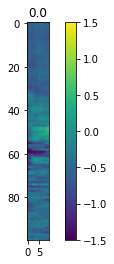

date:180331, rec:006, time:3522.0


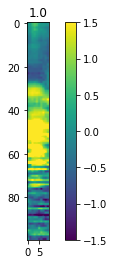

date:180325, rec:009, time:2220.0


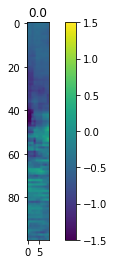

date:180322, rec:003, time:290.0


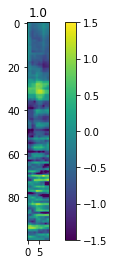

date:180325, rec:004, time:4694.0


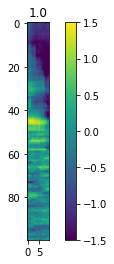

date:180325, rec:002, time:4458.0


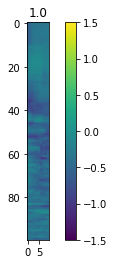

date:180331, rec:005, time:5878.0


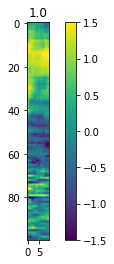

date:180324, rec:008, time:2808.0


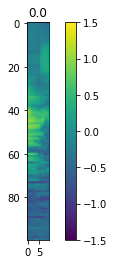

date:180331, rec:007, time:3807.0


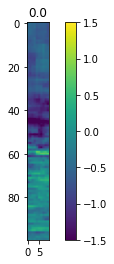

date:180329, rec:006, time:4807.0


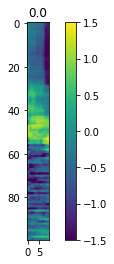

date:180325, rec:007, time:3588.0


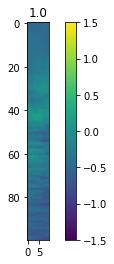

date:180325, rec:001, time:6731.0


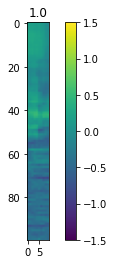

date:180327, rec:004, time:1130.0


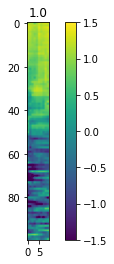

date:180401, rec:001, time:460.0


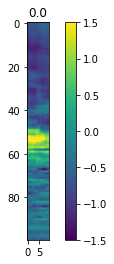

date:180329, rec:006, time:4727.0


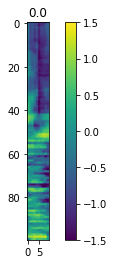

date:180330, rec:007, time:7098.0


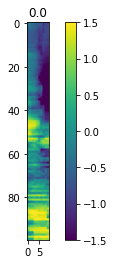

date:180330, rec:007, time:2392.0


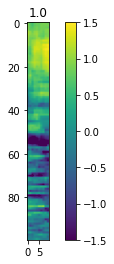

date:180327, rec:007, time:7111.0


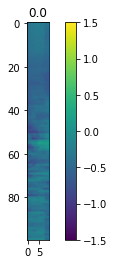

date:180327, rec:008, time:3892.0


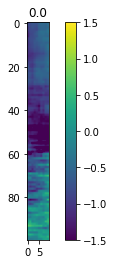

date:180330, rec:009, time:5091.0


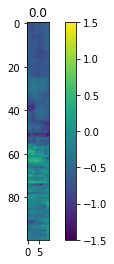

date:180330, rec:009, time:3450.0


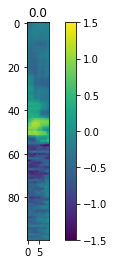

date:180330, rec:008, time:5645.0


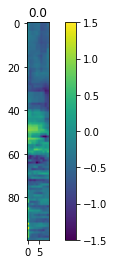

date:180324, rec:001, time:878.0


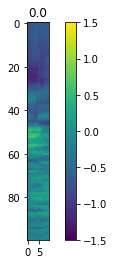

date:180331, rec:007, time:3197.0


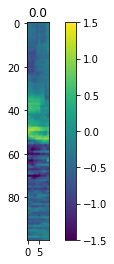

date:180325, rec:007, time:5503.0


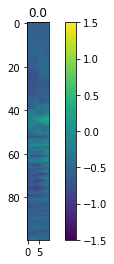

date:180331, rec:004, time:1650.0


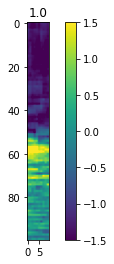

date:180325, rec:009, time:2370.0


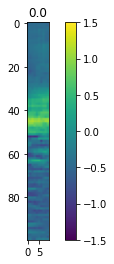

date:180327, rec:008, time:30.0


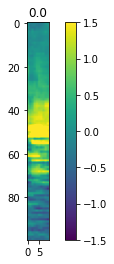

In [35]:
# movement labelled 0; non-movement labelled 1
for batch_idx, (data, label, date, rec, time) in enumerate(train_loader):
    for i in range(128):
        print('date:{}, rec:{}, time:{}'.format(date[i], rec[i], time[i]))
        data_sub = data[i][0]
        plt.imshow(data_sub)
        plt.clim(-1.5, 1.5)
        plt.colorbar()
        plt.title(label[i][0].numpy())
        plt.show()
    break

### Logistic regression with no regularization

In [47]:
import time
start = time.time()
device = torch.device('cuda')

tol = 0.01
learning_rate = 0.001
num_epochs = 51
alpha = 0
model_type = 'LR'
loss_type = 'bce'
reg_type = 'none'
timewindow = 10
CH = 'all'


model = GLM(62*100*timewindow).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

In [36]:
epochs, training_losses, training_acc, val_losses, validation_acc = [], [], [], [], []

for epoch in range(num_epochs):
    train_loss, train_acc = train(model, optimizer, train_loader, timewindow = timewindow, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
    print('Train loss for epoch {}: {}'.format(epoch, train_loss))
    val_loss, val_acc = evaluate(model, optimizer, val_loader, alpha=alpha,timewindow = timewindow, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
    print('Val loss for epoch {}: {}'.format(epoch, val_loss))
    if val_losses:
        if val_loss < min(val_losses):
            best_epoch = epoch
            print(epoch)
            path = model_saving_path
            torch.save(model.state_dict(), '{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}_REDUCEsum_valbalanced.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, epoch))
    epochs.append(epoch)
    training_losses.append(train_loss)
    training_acc.append(train_acc)
    val_losses.append(val_loss)
    validation_acc.append(val_acc)
    
    if train_loss < tol:
        break



Train loss for epoch 0: 0.4703538715839386
Val loss for epoch 0: 0.5907614827156067
Train loss for epoch 1: 0.36455950140953064
Val loss for epoch 1: 0.8213800191879272
Train loss for epoch 2: 0.3568306565284729
Val loss for epoch 2: 0.3706414997577667
2
Train loss for epoch 3: 0.37213271856307983
Val loss for epoch 3: 4.7921271324157715
Train loss for epoch 4: 0.570748507976532
Val loss for epoch 4: 0.5746967196464539
Train loss for epoch 5: 0.3284461200237274
Val loss for epoch 5: 0.6349462270736694
Train loss for epoch 6: 0.3525252044200897
Val loss for epoch 6: 0.867139458656311
Train loss for epoch 7: 0.3750893473625183
Val loss for epoch 7: 0.8830938339233398
Train loss for epoch 8: 0.38749179244041443
Val loss for epoch 8: 0.7892664074897766
Train loss for epoch 9: 0.2877303659915924
Val loss for epoch 9: 0.7516450881958008
Train loss for epoch 10: 0.2743372917175293
Val loss for epoch 10: 0.9315186142921448
Train loss for epoch 11: 0.29092147946357727
Val loss for epoch 11: 0.5

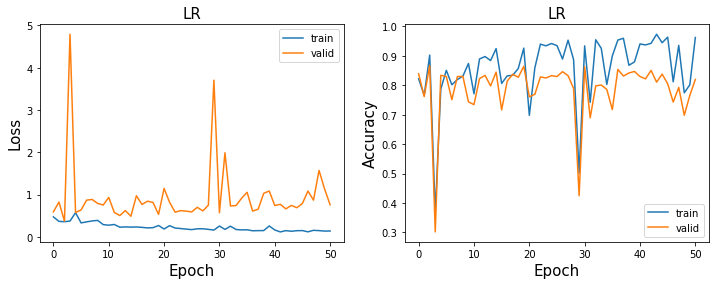

In [37]:
plot_loss_acc(training_losses, val_losses, training_acc, validation_acc, model_type) # new

In [48]:
model_LR = os.listdir(model_saving_path)
results = []
alphas = [0]
for alpha in alphas:
    best_result = 0
    reg_alpha = 'REG'+reg_type+str(alpha)+'_'
    for i, s in enumerate(model_LR):
        if 'LR_CHall_' in s and reg_alpha in s and '_valbalanced' in s:
            model_name = model_LR[i].split('_')
            epoch_name = [ind for ind,item in enumerate(np.array(model_name)) if "EPOCH" in item]
            res = [int(i) for i in model_name[epoch_name[0]] if i.isdigit()]
            if len(res) > 1:
                epoch_result = res[0]*10+res[1]
            else:
                epoch_result = res[0]
            if epoch_result>best_result and epoch_result != 50:
                best_result = epoch_result

    results.append([alpha,best_result])

    
results = pd.DataFrame(np.array(results), columns=['alpha', 'epoch'])
best_results = results.groupby('alpha').max('epoch')
print(best_results)


       epoch
alpha       
0          2


/mnt/pesaranlab/People/Capstone_students/Yue/model/model_Goose_all_2_upsample/LR_CHall_LOSSbce_REGnone0_EPOCH2_REDUCEsum_valbalanced.pt


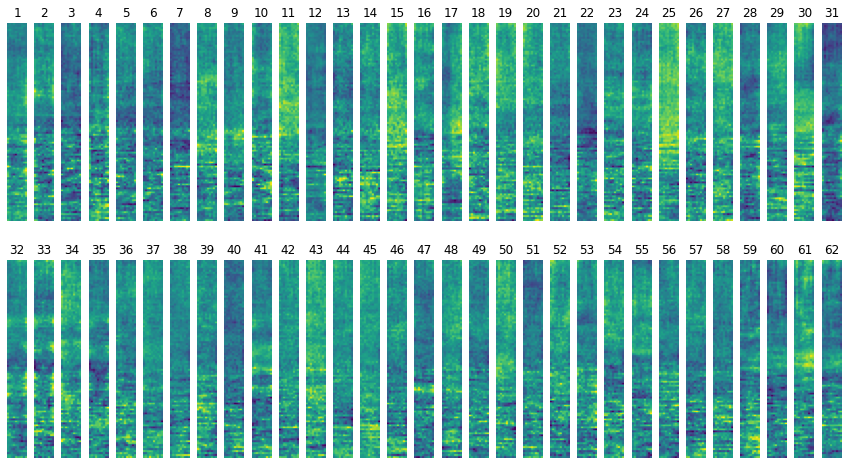

validation loss:0.37001389265060425 accuracy:0.86750651607298
0.5
test loss:0.6008802652359009 accuracy:0.7776328659928269
0.74029994


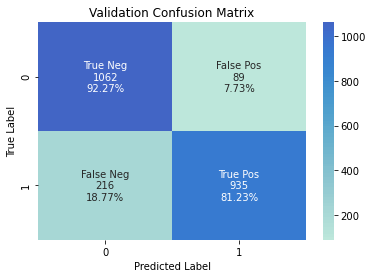

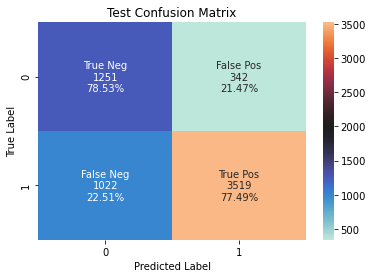

date:180412, rec:003, time:4481.0, label:1.0
Original data 62 CH


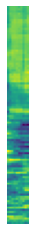

In [49]:
for i,(index,row) in enumerate(best_results.iterrows()):
    
    path = model_saving_path
    best_epoch = int(row)
    alpha = index
    
    
    # load best model
    model = GLM().to(device)
    path = model_saving_path
    optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)
    model.load_state_dict(torch.load('{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}_REDUCEsum_valbalanced.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, best_epoch)))
    
    print('{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}_REDUCEsum_valbalanced.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, best_epoch))

    ## Show features
    weights = model.linear.weight.view(62, 100, 10)
    plt.figure(figsize=(15,8))
    for i in range(62):
        weights_sub = weights[i].detach().cpu()
        plt.subplot(2,31,i+1)
        plt.axis('off')
        plt.imshow(weights_sub)
        plt.title(str(i+1))
        # plt.clim(-0.03, 0.03)
    plt.show()
    
    ## Calculate validation accuracy and validation loss
    val_loss, val_acc, val_preds, val_preds_probs, val_labels,_,_,_, cases_wrong_1 = evaluate(model, optimizer, val_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=True, device=device)
    print('validation loss:{} accuracy:{}'.format(val_loss, val_acc))
    print(np.mean(np.concatenate(val_labels)))
    
    ## Calculate test accuracy and test loss
    test_loss, test_acc, test_preds, test_preds_probs, test_labels,_,_,_, cases_wrong_2 = evaluate(model, optimizer, test_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=True, device=device)
    print('test loss:{} accuracy:{}'.format(test_loss, test_acc))
    print(np.mean(np.concatenate(test_labels)))
    
    ## Confusion matrix-validation
    predictions_val = np.concatenate(val_preds)
    labels_val = np.concatenate(val_labels)

    df_val = pd.DataFrame({'predictions': predictions_val, 'labels': labels_val})

    cm_val = confusion_matrix(labels_val, predictions_val)
    ax = plt.axes()
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ["{0:0.0f}".format(value) for value in
                    cm_val.flatten()]

    TNR = int(group_counts[0]) / (int(group_counts[0])+int(group_counts[1]))
    FPR = 1 - TNR
    TPR = int(group_counts[3]) / (int(group_counts[3])+int(group_counts[2]))
    FNR = 1-TPR
    group_percentages =[TNR, FPR, FNR, TPR]

    group_percentages = ["{0:.2%}".format(value) for value in
                         group_percentages]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
              zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sn.heatmap(cm_val, annot=labels, fmt='', center = 2000)
    ax.set_title('Validation Confusion Matrix')
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('True Label')
    plt.show()
    
    ## Confusion matrix-test
    predictions_test = np.concatenate(test_preds)
    labels_test = np.concatenate(test_labels)

    df_test = pd.DataFrame({'predictions': predictions_test, 'labels': labels_test})

    cm_test = confusion_matrix(labels_test, predictions_test)
    ax = plt.axes()
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ["{0:0.0f}".format(value) for value in
                    cm_test.flatten()]

    TNR = int(group_counts[0]) / (int(group_counts[0])+int(group_counts[1]))
    FPR = 1 - TNR
    TPR = int(group_counts[3]) / (int(group_counts[3])+int(group_counts[2]))
    FNR = 1-TPR
    group_percentages =[TNR, FPR, FNR, TPR]

    group_percentages = ["{0:.2%}".format(value) for value in
                         group_percentages]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
              zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sn.heatmap(cm_test, annot=labels, fmt='', center = 2000)
    ax.set_title('Test Confusion Matrix')
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('True Label')
    plt.show()
    
    ## Wrong Classifications
    path_wrong = '/mnt/pesaranlab/People/Capstone_students/Yue/wrong_pred'
    pickle.dump(cases_wrong_1, open('{}/{}_CH{}_LOSS{}_REG{}{}.pt'.format(path_wrong, model_type, CH, loss_type, reg_type, alpha), 'wb'))
    idx = 0
    print('date:{}, rec:{}, time:{}, label:{}'.format(cases_wrong_1[0][0], cases_wrong_1[0][1], cases_wrong_1[0][2], cases_wrong_1[0][3]))
    print('Original data 62 CH')
    weights_sub = cases_wrong_1[0][-1][0]
    plt.axis('off')
    plt.imshow(weights_sub)
    # plt.clim(-0.03, 0.03)
    plt.show()

### Logistic regression with L2 regularization

In [52]:
device = torch.device('cuda')

tol = 0.01
learning_rate = 0.001
num_epochs = 51
alphas = [1,50,100]
model_type = 'LR'
loss_type = 'bce'
reg_type = 'l2'
CH = 'all'
# model_save_path = '/home/bijanadmin/Desktop/Goose_data/model/model_Goose_10s_alldata_upsample'

timewindow = 10


Train loss for epoch 0: 1.118865728378296
Val loss for epoch 0: 0.46691444516181946
Train loss for epoch 1: 0.4516235589981079
Val loss for epoch 1: 0.9017531275749207
Train loss for epoch 2: 0.44596225023269653
Val loss for epoch 2: 0.42531806230545044
2
Train loss for epoch 3: 0.38176172971725464
Val loss for epoch 3: 0.48190736770629883
Train loss for epoch 4: 0.362914115190506
Val loss for epoch 4: 0.713355302810669
Train loss for epoch 5: 0.3516319692134857
Val loss for epoch 5: 0.45700639486312866
Train loss for epoch 6: 0.3077734112739563
Val loss for epoch 6: 0.5920274257659912
Train loss for epoch 7: 0.38287553191185
Val loss for epoch 7: 0.585273265838623
Train loss for epoch 8: 0.2949092388153076
Val loss for epoch 8: 0.4823237955570221
Train loss for epoch 9: 0.3003966212272644
Val loss for epoch 9: 1.4764885902404785
Train loss for epoch 10: 0.3267570436000824
Val loss for epoch 10: 0.8794407844543457
Train loss for epoch 11: 0.29164645075798035
Val loss for epoch 11: 0.66

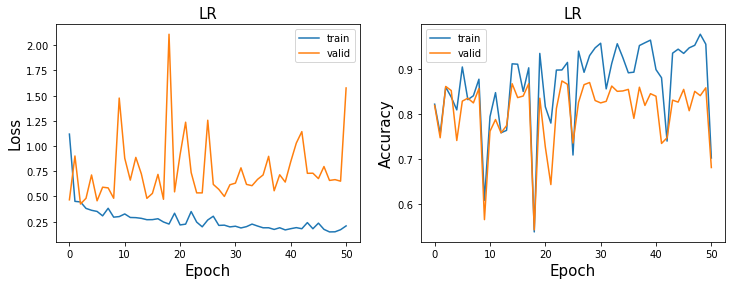

Train loss for epoch 0: 0.8270179629325867
Val loss for epoch 0: 0.5013706088066101
Train loss for epoch 1: 0.6104890704154968
Val loss for epoch 1: 0.683804988861084
Train loss for epoch 2: 0.6013872027397156
Val loss for epoch 2: 0.4194251000881195
2
Train loss for epoch 3: 0.5456101298332214
Val loss for epoch 3: 0.717879056930542
Train loss for epoch 4: 0.5705413222312927
Val loss for epoch 4: 1.1189402341842651
Train loss for epoch 5: 0.5887948274612427
Val loss for epoch 5: 0.4542795419692993
Train loss for epoch 6: 0.5474104881286621
Val loss for epoch 6: 0.5285047292709351
Train loss for epoch 7: 0.5578948259353638
Val loss for epoch 7: 1.5539714097976685
Train loss for epoch 8: 0.6147947311401367
Val loss for epoch 8: 0.7329475283622742
Train loss for epoch 9: 0.6107191443443298
Val loss for epoch 9: 0.7037840485572815
Train loss for epoch 10: 0.5285243988037109
Val loss for epoch 10: 0.43339040875434875
Train loss for epoch 11: 0.5039390921592712
Val loss for epoch 11: 0.4137

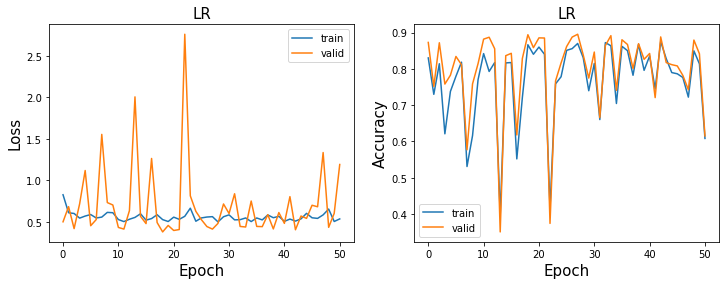

Train loss for epoch 0: 0.9659371972084045
Val loss for epoch 0: 0.4614934027194977
Train loss for epoch 1: 0.6440279483795166
Val loss for epoch 1: 0.8716614246368408
Train loss for epoch 2: 0.6922942399978638
Val loss for epoch 2: 0.4629886746406555
Train loss for epoch 3: 0.6072990894317627
Val loss for epoch 3: 0.746299147605896
Train loss for epoch 4: 0.6677570939064026
Val loss for epoch 4: 0.6353304982185364
Train loss for epoch 5: 0.6660614013671875
Val loss for epoch 5: 0.610245943069458
Train loss for epoch 6: 0.5887453556060791
Val loss for epoch 6: 0.6906545162200928
Train loss for epoch 7: 0.6457200050354004
Val loss for epoch 7: 1.2359851598739624
Train loss for epoch 8: 0.5735050439834595
Val loss for epoch 8: 0.4448566734790802
8
Train loss for epoch 9: 0.5600740909576416
Val loss for epoch 9: 0.8609806895256042
Train loss for epoch 10: 0.6243029832839966
Val loss for epoch 10: 2.3913156986236572
Train loss for epoch 11: 0.759891152381897
Val loss for epoch 11: 1.065498

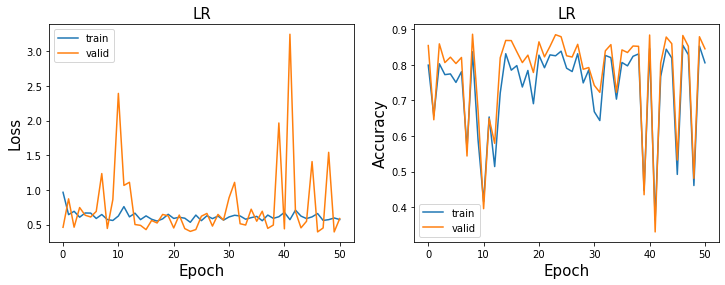

In [53]:
for alpha in alphas:
    model = GLM(62*100*timewindow).to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)
    epochs, training_losses, training_acc, val_losses, validation_acc = [], [], [], [], []

    for epoch in range(num_epochs):
        train_loss, train_acc = train(model, optimizer, train_loader, timewindow = timewindow, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
        print('Train loss for epoch {}: {}'.format(epoch, train_loss))
        val_loss, val_acc = evaluate(model, optimizer, val_loader, timewindow = timewindow, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
        print('Val loss for epoch {}: {}'.format(epoch, val_loss))
        if val_losses:
            if val_loss < min(val_losses):
                best_epoch = epoch
                print(epoch)
                path = model_saving_path
                torch.save(model.state_dict(), '{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}_REDUCEsum_valbalanced.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, epoch))
        epochs.append(epoch)
        training_losses.append(train_loss)
        training_acc.append(train_acc)
        val_losses.append(val_loss)
        validation_acc.append(val_acc)

        if train_loss < tol:
            break
    plot_loss_acc(training_losses, val_losses, training_acc, validation_acc, model_type) # new


In [54]:
model_LR = os.listdir(model_saving_path)
results = []
alphas = [1,50,100]
for alpha in alphas:
    best_result = 0
    reg_alpha = 'REG'+reg_type+str(alpha)+'_'
    for i, s in enumerate(model_LR):
        if 'LR_CHall_' in s and reg_alpha in s and '_valbalanced' in s:
            model_name = model_LR[i].split('_')
            epoch_name = [ind for ind,item in enumerate(np.array(model_name)) if "EPOCH" in item]
            res = [int(i) for i in model_name[epoch_name[0]] if i.isdigit()]
            if len(res) > 1:
                epoch_result = res[0]*10+res[1]
            else:
                epoch_result = res[0]
            if epoch_result>best_result and epoch_result != 50:
                best_result = epoch_result

    results.append([alpha,best_result])

    
results = pd.DataFrame(np.array(results), columns=['alpha', 'epoch'])
best_results = results.groupby('alpha').max('epoch')
print(best_results)


       epoch
alpha       
1          2
50        18
100       49


/mnt/pesaranlab/People/Capstone_students/Yue/model/model_Goose_all_2_upsample/LR_CHall_LOSSbce_REGl21_EPOCH2_REDUCEsum_valbalanced.pt


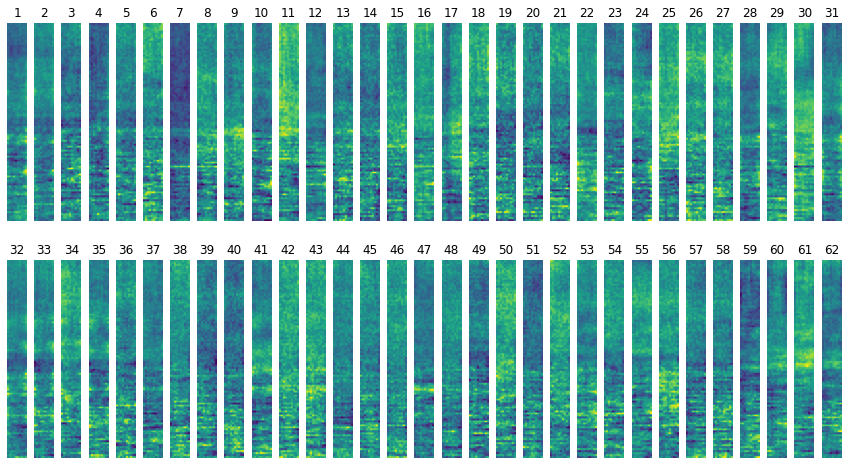

validation loss:0.42531806230545044 accuracy:0.8609904430929627
0.5
test loss:0.730980634689331 accuracy:0.7650798826214542
0.74029994


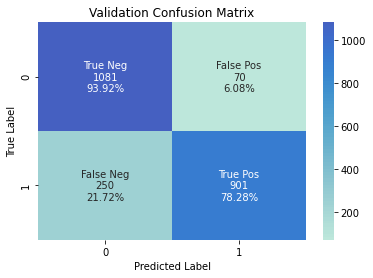

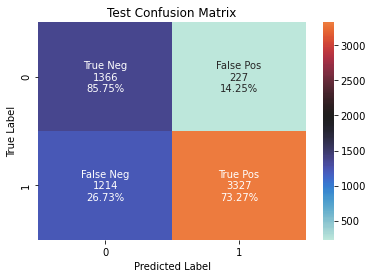

date:180412, rec:003, time:4481.0, label:1.0
Original data 62 CH


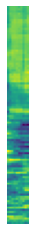

/mnt/pesaranlab/People/Capstone_students/Yue/model/model_Goose_all_2_upsample/LR_CHall_LOSSbce_REGl250_EPOCH18_REDUCEsum_valbalanced.pt


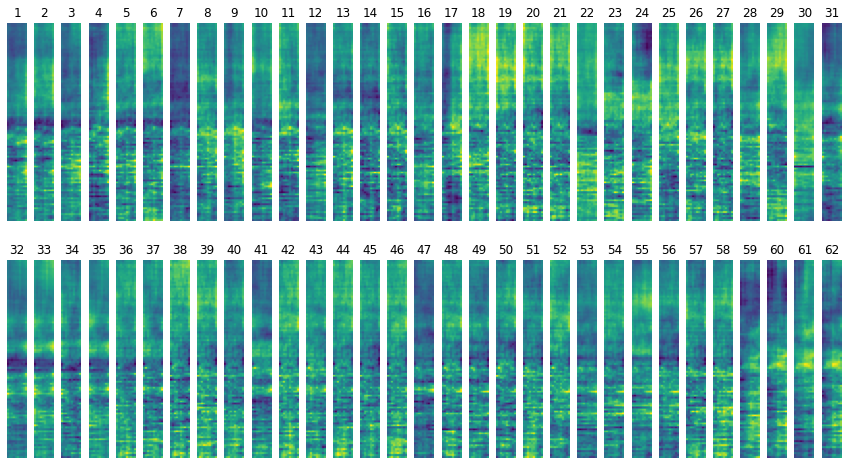

validation loss:0.3795889914035797 accuracy:0.894005212858384
0.5
test loss:0.5561888217926025 accuracy:0.81887838278448
0.74029994


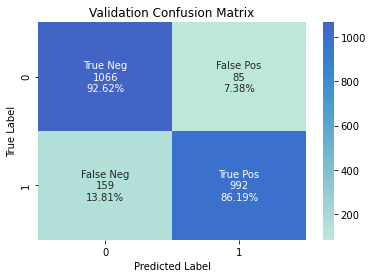

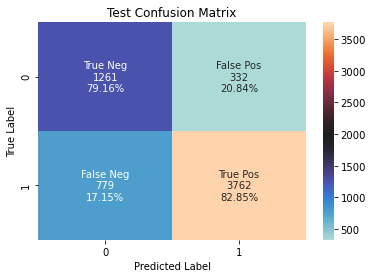

date:180414, rec:002, time:2546.0, label:1.0
Original data 62 CH


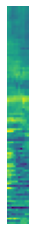

/mnt/pesaranlab/People/Capstone_students/Yue/model/model_Goose_all_2_upsample/LR_CHall_LOSSbce_REGl2100_EPOCH49_REDUCEsum_valbalanced.pt


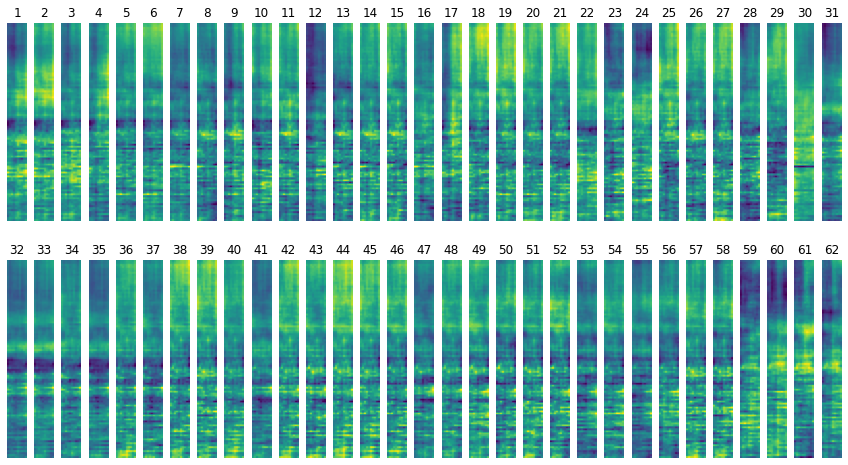

validation loss:0.3949999213218689 accuracy:0.8783666377063423
0.5
test loss:0.5371782779693604 accuracy:0.8156178676230844
0.74029994


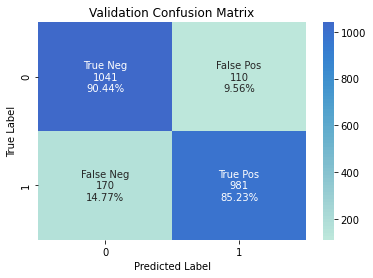

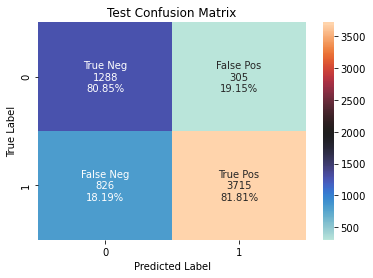

date:180414, rec:002, time:2546.0, label:1.0
Original data 62 CH


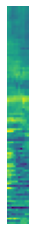

In [55]:
for i,(index,row) in enumerate(best_results.iterrows()):
    
    path = model_saving_path
    best_epoch = int(row)
    alpha = index
    
    
    # load best model
    model = GLM().to(device)
    path = model_saving_path
    optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)
    model.load_state_dict(torch.load('{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}_REDUCEsum_valbalanced.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, best_epoch)))
    
    print('{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}_REDUCEsum_valbalanced.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, best_epoch))

    ## Show features
    weights = model.linear.weight.view(62, 100, 10)
    plt.figure(figsize=(15,8))
    for i in range(62):
        weights_sub = weights[i].detach().cpu()
        plt.subplot(2,31,i+1)
        plt.axis('off')
        plt.imshow(weights_sub)
        plt.title(str(i+1))
        # plt.clim(-0.03, 0.03)
    plt.show()
    
    ## Calculate validation accuracy and validation loss
    val_loss, val_acc, val_preds, val_preds_probs, val_labels,_,_,_, cases_wrong_1 = evaluate(model, optimizer, val_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=True, device=device)
    print('validation loss:{} accuracy:{}'.format(val_loss, val_acc))
    print(np.mean(np.concatenate(val_labels)))
    
    ## Calculate test accuracy and test loss
    test_loss, test_acc, test_preds, test_preds_probs, test_labels,_,_,_, cases_wrong_2 = evaluate(model, optimizer, test_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=True, device=device)
    print('test loss:{} accuracy:{}'.format(test_loss, test_acc))
    print(np.mean(np.concatenate(test_labels)))
    
    ## Confusion matrix-validation
    predictions_val = np.concatenate(val_preds)
    labels_val = np.concatenate(val_labels)

    df_val = pd.DataFrame({'predictions': predictions_val, 'labels': labels_val})

    cm_val = confusion_matrix(labels_val, predictions_val)
    ax = plt.axes()
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ["{0:0.0f}".format(value) for value in
                    cm_val.flatten()]

    TNR = int(group_counts[0]) / (int(group_counts[0])+int(group_counts[1]))
    FPR = 1 - TNR
    TPR = int(group_counts[3]) / (int(group_counts[3])+int(group_counts[2]))
    FNR = 1-TPR
    group_percentages =[TNR, FPR, FNR, TPR]

    group_percentages = ["{0:.2%}".format(value) for value in
                         group_percentages]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
              zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sn.heatmap(cm_val, annot=labels, fmt='', center = 2000)
    ax.set_title('Validation Confusion Matrix')
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('True Label')
    plt.show()
    
    ## Confusion matrix-test
    predictions_test = np.concatenate(test_preds)
    labels_test = np.concatenate(test_labels)

    df_test = pd.DataFrame({'predictions': predictions_test, 'labels': labels_test})

    cm_test = confusion_matrix(labels_test, predictions_test)
    ax = plt.axes()
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ["{0:0.0f}".format(value) for value in
                    cm_test.flatten()]

    TNR = int(group_counts[0]) / (int(group_counts[0])+int(group_counts[1]))
    FPR = 1 - TNR
    TPR = int(group_counts[3]) / (int(group_counts[3])+int(group_counts[2]))
    FNR = 1-TPR
    group_percentages =[TNR, FPR, FNR, TPR]

    group_percentages = ["{0:.2%}".format(value) for value in
                         group_percentages]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
              zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sn.heatmap(cm_test, annot=labels, fmt='', center = 2000)
    ax.set_title('Test Confusion Matrix')
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('True Label')
    plt.show()
    
    ## Wrong Classifications
    path_wrong = '/mnt/pesaranlab/People/Capstone_students/Yue/wrong_pred'
    pickle.dump(cases_wrong_1, open('{}/{}_CH{}_LOSS{}_REG{}{}.pt'.format(path_wrong, model_type, CH, loss_type, reg_type, alpha), 'wb'))
    idx = 0
    print('date:{}, rec:{}, time:{}, label:{}'.format(cases_wrong_1[0][0], cases_wrong_1[0][1], cases_wrong_1[0][2], cases_wrong_1[0][3]))
    print('Original data 62 CH')
    weights_sub = cases_wrong_1[0][-1][0]
    plt.axis('off')
    plt.imshow(weights_sub)
    # plt.clim(-0.03, 0.03)
    plt.show()

### Logistic Regression with finite difference regularization

In [56]:
device = torch.device('cuda')

tol = 0.01
learning_rate = 0.001
num_epochs = 51
alphas = [1,50,100]
model_type = 'LR'
loss_type = 'bce'
reg_type = 'finite_diff'
CH = 'all'
timewindow = 10
# model_save_path = '/mnt/pesaranlab/People/Capstone_students/Yue/model/model_Goose_10s_alldata_upsample'


Train loss for epoch 0: 0.9298926591873169
Val loss for epoch 0: 0.4648999273777008
Train loss for epoch 1: 0.4346434473991394
Val loss for epoch 1: 3.7186367511749268
Train loss for epoch 2: 1.7278690338134766
Val loss for epoch 2: 0.43004101514816284
2
Train loss for epoch 3: 0.42039552330970764
Val loss for epoch 3: 0.43076494336128235
Train loss for epoch 4: 0.3770042955875397
Val loss for epoch 4: 0.6067765355110168
Train loss for epoch 5: 0.35286515951156616
Val loss for epoch 5: 0.5391533970832825
Train loss for epoch 6: 0.34956249594688416
Val loss for epoch 6: 0.5499478578567505
Train loss for epoch 7: 0.3396981656551361
Val loss for epoch 7: 0.4359833896160126
Train loss for epoch 8: 0.32107868790626526
Val loss for epoch 8: 0.6546428799629211
Train loss for epoch 9: 0.3204619586467743
Val loss for epoch 9: 0.4406002461910248
Train loss for epoch 10: 0.2780832350254059
Val loss for epoch 10: 1.1742137670516968
Train loss for epoch 11: 0.33863338828086853
Val loss for epoch 11

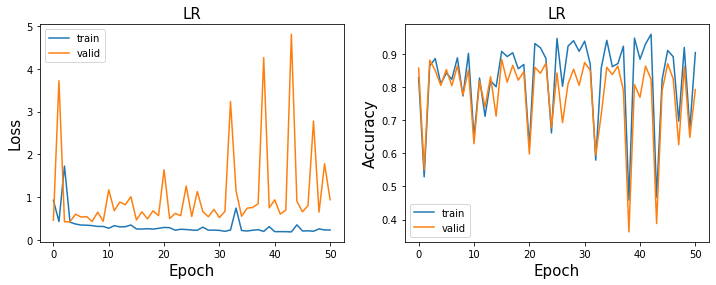

Train loss for epoch 0: 1.060325264930725
Val loss for epoch 0: 0.660524845123291
Train loss for epoch 1: 0.511711061000824
Val loss for epoch 1: 0.9862093925476074
Train loss for epoch 2: 0.5281505584716797
Val loss for epoch 2: 0.43162116408348083
2
Train loss for epoch 3: 0.5000926852226257
Val loss for epoch 3: 0.5469269752502441
Train loss for epoch 4: 0.49603351950645447
Val loss for epoch 4: 1.4405399560928345
Train loss for epoch 5: 0.5862104892730713
Val loss for epoch 5: 0.5142383575439453
Train loss for epoch 6: 0.4697648286819458
Val loss for epoch 6: 0.4519006609916687
Train loss for epoch 7: 0.513796329498291
Val loss for epoch 7: 0.8475767970085144
Train loss for epoch 8: 0.5005978941917419
Val loss for epoch 8: 0.4068532884120941
8
Train loss for epoch 9: 0.45724332332611084
Val loss for epoch 9: 1.885966420173645
Train loss for epoch 10: 0.5190044045448303
Val loss for epoch 10: 0.6533398628234863
Train loss for epoch 11: 0.4835372865200043
Val loss for epoch 11: 0.682

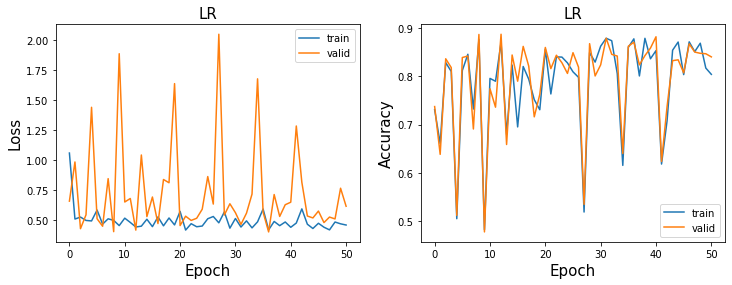

Train loss for epoch 0: 0.9911687970161438
Val loss for epoch 0: 0.89359450340271
Train loss for epoch 1: 0.578372597694397
Val loss for epoch 1: 1.5201371908187866
Train loss for epoch 2: 0.5902173519134521
Val loss for epoch 2: 0.49500033259391785
2
Train loss for epoch 3: 0.5272279977798462
Val loss for epoch 3: 0.364815354347229
3
Train loss for epoch 4: 0.5481891632080078
Val loss for epoch 4: 0.566662073135376
Train loss for epoch 5: 0.5706322193145752
Val loss for epoch 5: 0.4727887213230133
Train loss for epoch 6: 0.5184354782104492
Val loss for epoch 6: 0.48789548873901367
Train loss for epoch 7: 0.4920153021812439
Val loss for epoch 7: 0.5005751252174377
Train loss for epoch 8: 0.524844229221344
Val loss for epoch 8: 0.45476263761520386
Train loss for epoch 9: 0.5299488306045532
Val loss for epoch 9: 0.3820425570011139
Train loss for epoch 10: 0.5073677897453308
Val loss for epoch 10: 0.4174972474575043
Train loss for epoch 11: 0.5121261477470398
Val loss for epoch 11: 0.5023

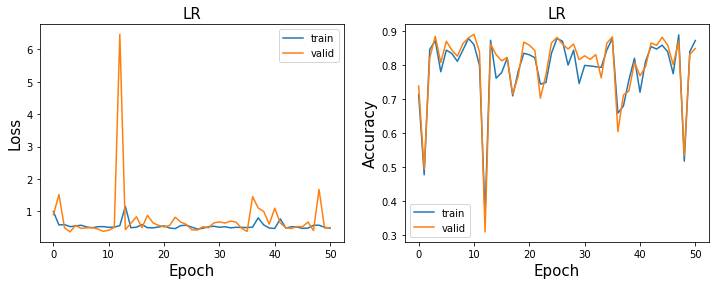

In [57]:
for alpha in alphas:
    model = GLM(62*100*timewindow).to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)
    epochs, training_losses, training_acc, val_losses, validation_acc = [], [], [], [], []

    for epoch in range(num_epochs):
        train_loss, train_acc = train(model, optimizer, train_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
        print('Train loss for epoch {}: {}'.format(epoch, train_loss))
        val_loss, val_acc = evaluate(model, optimizer, val_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
        print('Val loss for epoch {}: {}'.format(epoch, val_loss))
        if val_losses:
            if val_loss < min(val_losses):
                best_epoch = epoch
                print(epoch)
                path = model_saving_path
                torch.save(model.state_dict(), '{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}_REDUCEsum_valbalanced.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, epoch))
        epochs.append(epoch)
        training_losses.append(train_loss)
        training_acc.append(train_acc)
        val_losses.append(val_loss)
        validation_acc.append(val_acc)

        if train_loss < tol:
            break
    plot_loss_acc(training_losses, val_losses, training_acc, validation_acc, model_type) # new

In [58]:
model_LR = os.listdir(model_saving_path)
results = []
alphas = [1,50,100]
for alpha in alphas:
    best_result = 0
    reg_alpha = 'REG'+reg_type+str(alpha)+'_'
    for i, s in enumerate(model_LR):
        if 'LR_CHall_' in s and reg_alpha in s and '_valbalanced' in s:
            model_name = model_LR[i].split('_')
            epoch_name = [ind for ind,item in enumerate(np.array(model_name)) if "EPOCH" in item]
            res = [int(i) for i in model_name[epoch_name[0]] if i.isdigit()]
            if len(res) > 1:
                epoch_result = res[0]*10+res[1]
            else:
                epoch_result = res[0]
            if epoch_result>best_result and epoch_result != 50:
                best_result = epoch_result

    results.append([alpha,best_result])

    
results = pd.DataFrame(np.array(results), columns=['alpha', 'epoch'])
best_results = results.groupby('alpha').max('epoch')
print(best_results)


       epoch
alpha       
1          2
50        36
100        3


In [59]:
for i,(index,row) in enumerate(best_results.iterrows()):
    
    path = model_saving_path
    best_epoch = int(row)
    alpha = index
    
    
    # load best model
    model = GLM().to(device)
    path = model_saving_path
    optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)
    model.load_state_dict(torch.load('{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}_REDUCEsum.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, best_epoch)))
    
    print('{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}_REDUCEsum.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, best_epoch))

    ## Show features
    weights = model.linear.weight.view(62, 100, 10)
    plt.figure(figsize=(15,8))
    for i in range(62):
        weights_sub = weights[i].detach().cpu()
        plt.subplot(2,31,i+1)
        plt.axis('off')
        plt.imshow(weights_sub)
        plt.title(str(i+1))
        # plt.clim(-0.03, 0.03)
    plt.show()
    
    ## Calculate validation accuracy and validation loss
    val_loss, val_acc, val_preds, val_preds_probs, val_labels,_,_,_, cases_wrong_1 = evaluate(model, optimizer, val_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=True, device=device)
    print('validation loss:{} accuracy:{}'.format(val_loss, val_acc))
    print(np.mean(np.concatenate(val_labels)))
    
    ## Calculate test accuracy and test loss
    test_loss, test_acc, test_preds, test_preds_probs, test_labels,_,_,_, cases_wrong_2 = evaluate(model, optimizer, test_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=True, device=device)
    print('test loss:{} accuracy:{}'.format(test_loss, test_acc))
    print(np.mean(np.concatenate(test_labels)))
    
    ## Confusion matrix-validation
    predictions_val = np.concatenate(val_preds)
    labels_val = np.concatenate(val_labels)

    df_val = pd.DataFrame({'predictions': predictions_val, 'labels': labels_val})

    cm_val = confusion_matrix(labels_val, predictions_val)
    ax = plt.axes()
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ["{0:0.0f}".format(value) for value in
                    cm_val.flatten()]

    TNR = int(group_counts[0]) / (int(group_counts[0])+int(group_counts[1]))
    FPR = 1 - TNR
    TPR = int(group_counts[3]) / (int(group_counts[3])+int(group_counts[2]))
    FNR = 1-TPR
    group_percentages =[TNR, FPR, FNR, TPR]

    group_percentages = ["{0:.2%}".format(value) for value in
                         group_percentages]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
              zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sn.heatmap(cm_val, annot=labels, fmt='', center = 2000)
    ax.set_title('Validation Confusion Matrix')
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('True Label')
    plt.show()
    
    ## Confusion matrix-test
    predictions_test = np.concatenate(test_preds)
    labels_test = np.concatenate(test_labels)

    df_test = pd.DataFrame({'predictions': predictions_test, 'labels': labels_test})

    cm_test = confusion_matrix(labels_test, predictions_test)
    ax = plt.axes()
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ["{0:0.0f}".format(value) for value in
                    cm_test.flatten()]

    TNR = int(group_counts[0]) / (int(group_counts[0])+int(group_counts[1]))
    FPR = 1 - TNR
    TPR = int(group_counts[3]) / (int(group_counts[3])+int(group_counts[2]))
    FNR = 1-TPR
    group_percentages =[TNR, FPR, FNR, TPR]

    group_percentages = ["{0:.2%}".format(value) for value in
                         group_percentages]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
              zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sn.heatmap(cm_test, annot=labels, fmt='', center = 2000)
    ax.set_title('Test Confusion Matrix')
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('True Label')
    plt.show()
    
    ## Wrong Classifications
    path_wrong = '/mnt/pesaranlab/People/Capstone_students/Yue/wrong_pred'
    pickle.dump(cases_wrong_1, open('{}/{}_CH{}_LOSS{}_REG{}{}.pt'.format(path_wrong, model_type, CH, loss_type, reg_type, alpha), 'wb'))
    idx = 0
    print('date:{}, rec:{}, time:{}, label:{}'.format(cases_wrong_1[0][0], cases_wrong_1[0][1], cases_wrong_1[0][2], cases_wrong_1[0][3]))
    print('Original data 62 CH')
    weights_sub = cases_wrong_1[0][-1][0]
    plt.axis('off')
    plt.imshow(weights_sub)
    # plt.clim(-0.03, 0.03)
    plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '/mnt/pesaranlab/People/Capstone_students/Yue/model/model_Goose_all_2_upsample/LR_CHall_LOSSbce_REGfinite_diff1_EPOCH2_REDUCEsum.pt'

### SVM without regularization

In [22]:
device = torch.device('cuda')

tol = 0.01
learning_rate = 0.001
num_epochs = 51
alpha = 0 
model_type = 'SVM'
loss_type = 'hinge'
reg_type = 'none' # expect to be bad, since predictions could be arbitrarily far from boundaries
CH = 'all'

model = GLM().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

In [13]:
epochs, training_losses, training_acc, val_losses, validation_acc = [], [], [], [], []

for epoch in range(num_epochs):
    train_loss, train_acc = train(model, optimizer, train_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
    print('Train loss for epoch {}: {}'.format(epoch, train_loss))
    val_loss, val_acc = evaluate(model, optimizer, val_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
    print('Val loss for epoch {}: {}'.format(epoch, val_loss))
    if val_losses:
        if val_loss < min(val_losses):
            best_epoch = epoch
            print(epoch)
            path = '/mnt/pesaranlab/People/Capstone_students/Yue/model/model_Goose_1st_1_upsample'
            torch.save(model.state_dict(), '{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, epoch))
    epochs.append(epoch)
    training_losses.append(train_loss)
    training_acc.append(train_acc)
    val_losses.append(val_loss)
    validation_acc.append(val_acc)
    
    if train_loss < tol:
        break

Train loss for epoch 0: 0.6105479598045349
Val loss for epoch 0: 1.2834664583206177
Train loss for epoch 1: 0.5602447986602783
Val loss for epoch 1: 0.9178999662399292
1
Train loss for epoch 2: 0.4674215018749237
Val loss for epoch 2: 3.1678149700164795
Train loss for epoch 3: 0.5240594744682312
Val loss for epoch 3: 0.9516066312789917
Train loss for epoch 4: 0.4172993004322052
Val loss for epoch 4: 1.5819454193115234
Train loss for epoch 5: 0.4704030156135559
Val loss for epoch 5: 1.1257431507110596
Train loss for epoch 6: 0.3469279408454895
Val loss for epoch 6: 1.4243940114974976
Train loss for epoch 7: 0.3866455554962158
Val loss for epoch 7: 1.1779205799102783
Train loss for epoch 8: 0.33019065856933594
Val loss for epoch 8: 1.365188479423523
Train loss for epoch 9: 0.3815663754940033
Val loss for epoch 9: 1.5121104717254639
Train loss for epoch 10: 0.40764206647872925
Val loss for epoch 10: 1.7473173141479492
Train loss for epoch 11: 0.3409585654735565
Val loss for epoch 11: 1.27

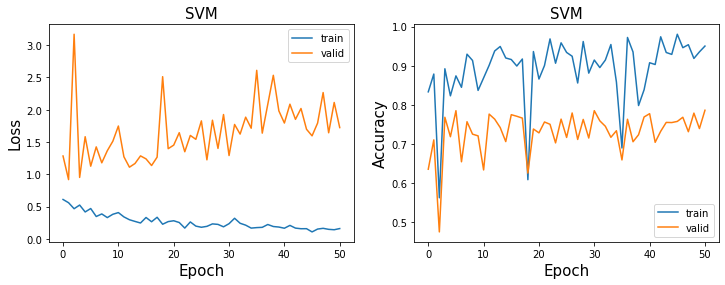

In [14]:
plot_loss_acc(training_losses, val_losses, training_acc, validation_acc, model_type)

In [23]:
best_epoch = 1

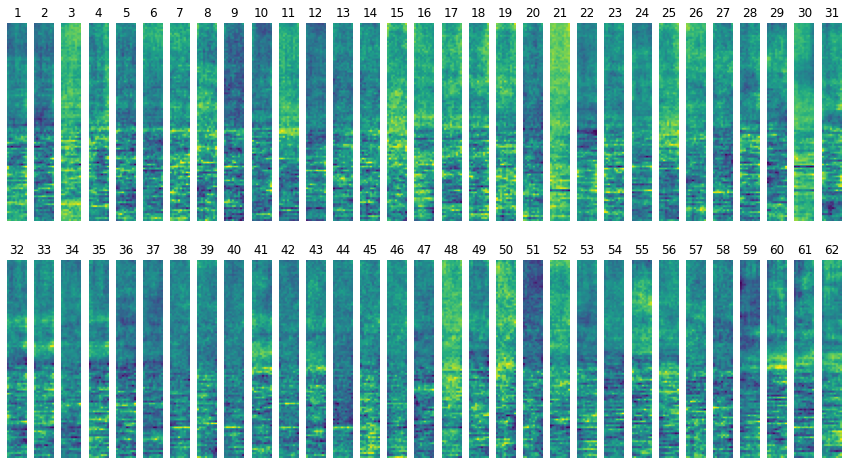

In [24]:
model = GLM().to(device)
path = '/mnt/pesaranlab/People/Capstone_students/Yue/model/model_Goose_1st_1_upsample'
model.load_state_dict(torch.load('{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, best_epoch)))
weights = model.linear.weight.view(62, 100, 10)
plt.figure(figsize=(15,8))
for i in range(62):
    weights_sub = weights[i].detach().cpu()
    plt.subplot(2,31,i+1)
    plt.axis('off')
    plt.imshow(weights_sub)
    plt.title(str(i+1))
    # plt.clim(-0.03, 0.03)
plt.show()

In [27]:
test_loss, test_acc, test_preds, test_preds_probs, test_labels, cases_wrong_3 = evaluate(model, optimizer, test_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=True, device=device)
print('test loss:{} accuracy:{}'.format(test_loss, test_acc))

test loss:0.7428555488586426 accuracy:0.7838461538461539


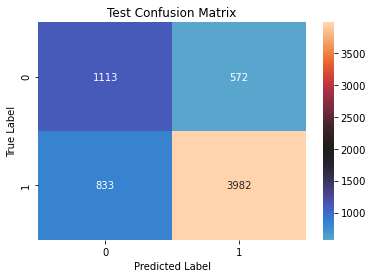

In [28]:
predictions_test = np.concatenate(test_preds)
labels_test = np.concatenate(test_labels)

df_test = pd.DataFrame({'predictions': predictions_test, 'labels': labels_test})

cm_test = confusion_matrix(labels_test, predictions_test)
ax = plt.axes()
sn.heatmap(cm_test, annot = True, fmt = "d", ax = ax, center=2000)
ax.set_title('Test Confusion Matrix')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
plt.show()

date:180330, rec:007, time:007, label:1.0
Original data 62 CH


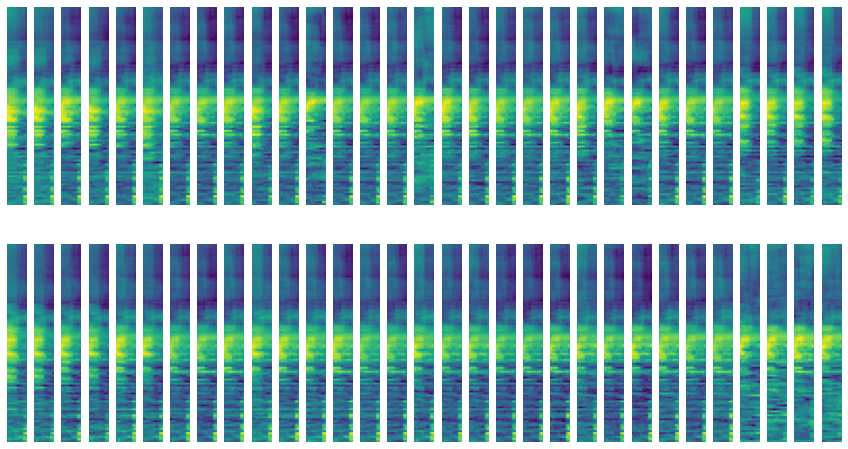

In [30]:
idx = 0
print('date:{}, rec:{}, time:{}, label:{}'.format(cases_wrong_3[0][0], cases_wrong_3[0][1], cases_wrong_3[0][1], cases_wrong_3[0][3]))
print('Original data 62 CH')
plt.figure(figsize=(15,8))
for i in range(62):
    weights_sub = cases_wrong_3[0][-1][i]
    plt.subplot(2,31,i+1)
    plt.axis('off')
    plt.imshow(weights_sub)
    # plt.clim(-0.03, 0.03)
plt.show()

### SVM with L2 regularization

In [31]:
device = torch.device('cuda')

tol = 0.01
learning_rate = 0.001
num_epochs = 51
alpha = 0.5 # have special meaning as margin, corresponding to 1 in the hinge loss
model_type = 'SVM'
loss_type = 'hinge'
reg_type = 'l2'
CH = 'all'

model = GLM().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

In [16]:
epochs, training_losses, training_acc, val_losses, validation_acc = [], [], [], [], []

for epoch in range(num_epochs):
    train_loss, train_acc = train(model, optimizer, train_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
    print('Train loss for epoch {}: {}'.format(epoch, train_loss))
    val_loss, val_acc = evaluate(model, optimizer, val_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
    print('Val loss for epoch {}: {}'.format(epoch, val_loss))
    if val_losses:
        if val_loss < min(val_losses):
            best_epoch = epoch
            print(epoch)
            path = '/mnt/pesaranlab/People/Capstone_students/Yue/model/model_Goose_1st_1_upsample'
            torch.save(model.state_dict(), '{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, epoch))
    epochs.append(epoch)
    training_losses.append(train_loss)
    training_acc.append(train_acc)
    val_losses.append(val_loss)
    validation_acc.append(val_acc)
    
    if train_loss < tol:
        break

Train loss for epoch 0: 1.142331600189209
Val loss for epoch 0: 2.375016927719116
Train loss for epoch 1: 0.8872479200363159
Val loss for epoch 1: 0.9689788222312927
1
Train loss for epoch 2: 0.9464882612228394
Val loss for epoch 2: 1.0704563856124878
Train loss for epoch 3: 0.8319297432899475
Val loss for epoch 3: 1.3819953203201294
Train loss for epoch 4: 0.9815953969955444
Val loss for epoch 4: 2.2135136127471924
Train loss for epoch 5: 0.9559652209281921
Val loss for epoch 5: 1.3571209907531738
Train loss for epoch 6: 0.9480046629905701
Val loss for epoch 6: 0.958657443523407
6
Train loss for epoch 7: 0.8747104406356812
Val loss for epoch 7: 1.0527974367141724
Train loss for epoch 8: 0.938942551612854
Val loss for epoch 8: 1.816292405128479
Train loss for epoch 9: 1.033324956893921
Val loss for epoch 9: 1.2031350135803223
Train loss for epoch 10: 0.908989667892456
Val loss for epoch 10: 0.6989802718162537
10
Train loss for epoch 11: 0.9314482808113098
Val loss for epoch 11: 1.08010

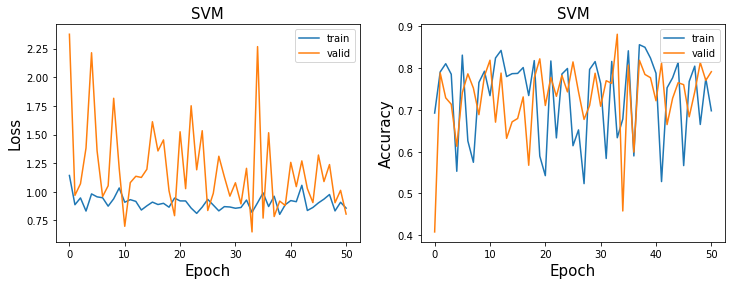

In [17]:
plot_loss_acc(training_losses, val_losses, training_acc, validation_acc, model_type)

In [32]:
best_epoch = 33

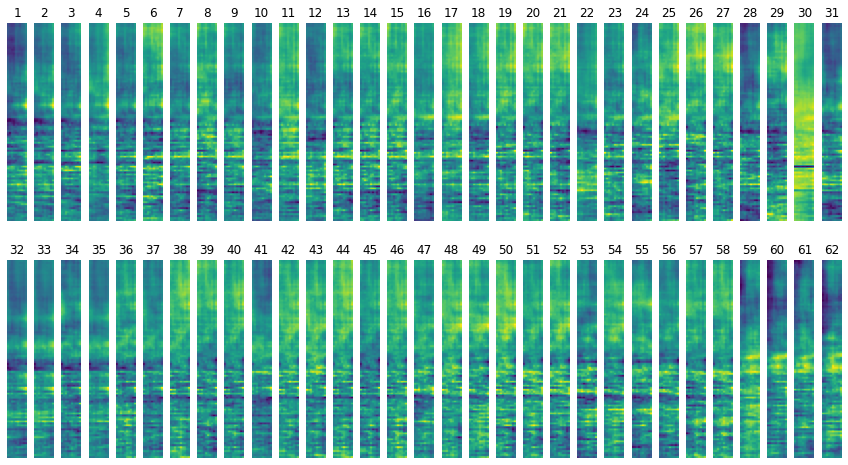

In [33]:
model = GLM().to(device)
path = '/mnt/pesaranlab/People/Capstone_students/Yue/model/model_Goose_1st_1_upsample'
model.load_state_dict(torch.load('{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, best_epoch)))
weights = model.linear.weight.view(62, 100, 10)
plt.figure(figsize=(15,8))
for i in range(62):
    weights_sub = weights[i].detach().cpu()
    plt.subplot(2,31,i+1)
    plt.axis('off')
    plt.imshow(weights_sub)
    plt.title(str(i+1))
    # plt.clim(-0.03, 0.03)
plt.show()

In [34]:
test_loss, test_acc, test_preds, test_preds_probs, test_labels, cases_wrong_4 = evaluate(model, optimizer, test_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=True, device=device)
print('test loss:{} accuracy:{}'.format(test_loss, test_acc))

test loss:1.2684636116027832 accuracy:0.7512307692307693


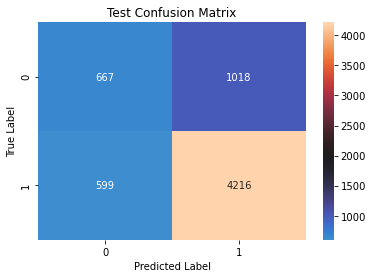

In [35]:
predictions_test = np.concatenate(test_preds)
labels_test = np.concatenate(test_labels)

df_test = pd.DataFrame({'predictions': predictions_test, 'labels': labels_test})

cm_test = confusion_matrix(labels_test, predictions_test)
ax = plt.axes()
sn.heatmap(cm_test, annot = True, fmt = "d", ax = ax, center=2000)
ax.set_title('Test Confusion Matrix')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
plt.show()

date:180330, rec:007, time:007, label:1.0
Original data 62 CH


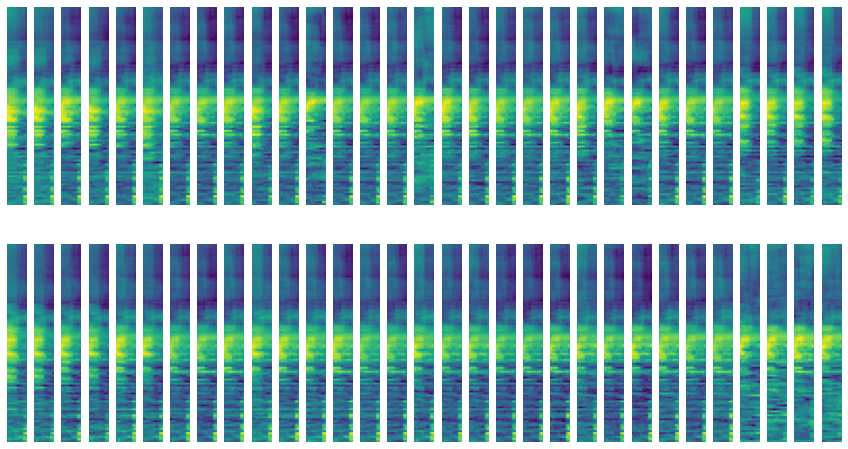

In [36]:
idx = 0
print('date:{}, rec:{}, time:{}, label:{}'.format(cases_wrong_4[0][0], cases_wrong_4[0][1], cases_wrong_4[0][1], cases_wrong_4[0][3]))
print('Original data 62 CH')
plt.figure(figsize=(15,8))
for i in range(62):
    weights_sub = cases_wrong_4[0][-1][i]
    plt.subplot(2,31,i+1)
    plt.axis('off')
    plt.imshow(weights_sub)
    # plt.clim(-0.03, 0.03)
plt.show()

### SVM with finite difference regularization

In [37]:
device = torch.device('cuda')

tol = 0.01
learning_rate = 0.001
num_epochs = 51
alpha = 0.5
model_type = 'SVM'
loss_type = 'hinge'
reg_type = 'finite_diff'
CH = 'all'

model = GLM().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

In [19]:
epochs, training_losses, training_acc, val_losses, validation_acc = [], [], [], [], []

for epoch in range(num_epochs):
    train_loss, train_acc = train(model, optimizer, train_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
    print('Train loss for epoch {}: {}'.format(epoch, train_loss))
    val_loss, val_acc = evaluate(model, optimizer, val_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
    print('Val loss for epoch {}: {}'.format(epoch, val_loss))
    if val_losses:
        if val_loss < min(val_losses):
            best_epoch = epoch
            print(epoch)
            path = '/mnt/pesaranlab/People/Capstone_students/Yue/model/model_Goose_1st_1_upsample'
            torch.save(model.state_dict(), '{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, epoch))
    epochs.append(epoch)
    training_losses.append(train_loss)
    training_acc.append(train_acc)
    val_losses.append(val_loss)
    validation_acc.append(val_acc)
    
    if train_loss < tol:
        break

Train loss for epoch 0: 1.1333791017532349
Val loss for epoch 0: 1.699452519416809
Train loss for epoch 1: 0.7799455523490906
Val loss for epoch 1: 1.1568527221679688
1
Train loss for epoch 2: 0.8088831305503845
Val loss for epoch 2: 1.5023279190063477
Train loss for epoch 3: 0.7681555151939392
Val loss for epoch 3: 1.125550389289856
3
Train loss for epoch 4: 0.779151201248169
Val loss for epoch 4: 0.9314382076263428
4
Train loss for epoch 5: 0.6864786744117737
Val loss for epoch 5: 1.0832509994506836
Train loss for epoch 6: 0.6971858739852905
Val loss for epoch 6: 1.0215011835098267
Train loss for epoch 7: 0.7639809250831604
Val loss for epoch 7: 1.7163935899734497
Train loss for epoch 8: 0.7523619532585144
Val loss for epoch 8: 1.3559271097183228
Train loss for epoch 9: 0.837641179561615
Val loss for epoch 9: 1.0237863063812256
Train loss for epoch 10: 0.7160231471061707
Val loss for epoch 10: 1.128845453262329
Train loss for epoch 11: 0.7040753364562988
Val loss for epoch 11: 3.2867

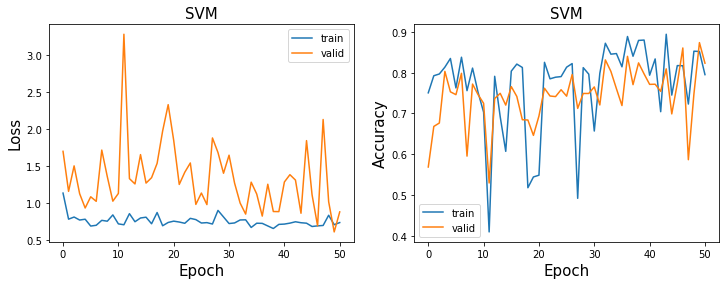

In [20]:
plot_loss_acc(training_losses, val_losses, training_acc, validation_acc, model_type)

In [38]:
best_epoch = 49

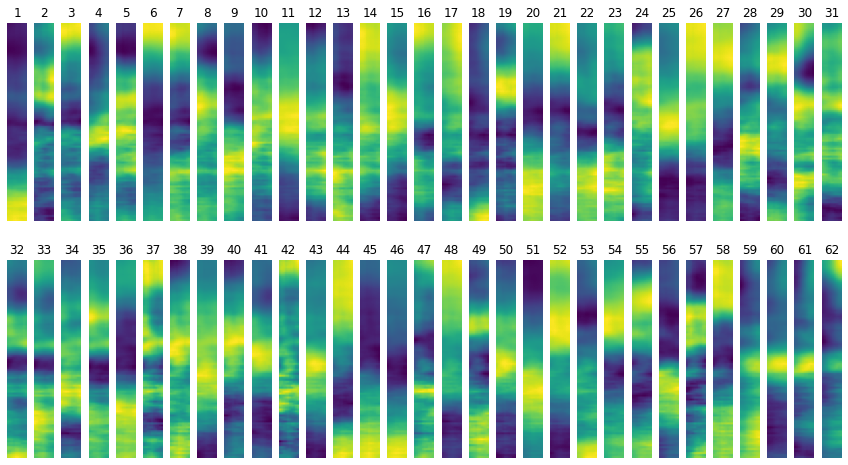

In [39]:
model = GLM().to(device)
path = '/mnt/pesaranlab/People/Capstone_students/Yue/model/model_Goose_1st_1_upsample'
model.load_state_dict(torch.load('{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, best_epoch)))
weights = model.linear.weight.view(62, 100, 10)
plt.figure(figsize=(15,8))
for i in range(62):
    weights_sub = weights[i].detach().cpu()
    plt.subplot(2,31,i+1)
    plt.axis('off')
    plt.imshow(weights_sub)
    plt.title(str(i+1))
    # plt.clim(-0.03, 0.03)
plt.show()

In [40]:
test_loss, test_acc, test_preds, test_preds_probs, test_labels, cases_wrong_5 = evaluate(model, optimizer, test_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=True, device=device)
print('test loss:{} accuracy:{}'.format(test_loss, test_acc))

test loss:0.8956817984580994 accuracy:0.8355384615384616


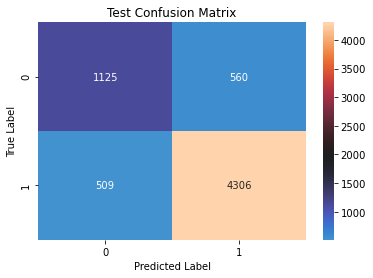

In [41]:
predictions_test = np.concatenate(test_preds)
labels_test = np.concatenate(test_labels)

df_test = pd.DataFrame({'predictions': predictions_test, 'labels': labels_test})

cm_test = confusion_matrix(labels_test, predictions_test)
ax = plt.axes()
sn.heatmap(cm_test, annot = True, fmt = "d", ax = ax, center=2000)
ax.set_title('Test Confusion Matrix')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
plt.show()

date:180330, rec:007, time:007, label:1.0
Original data 62 CH


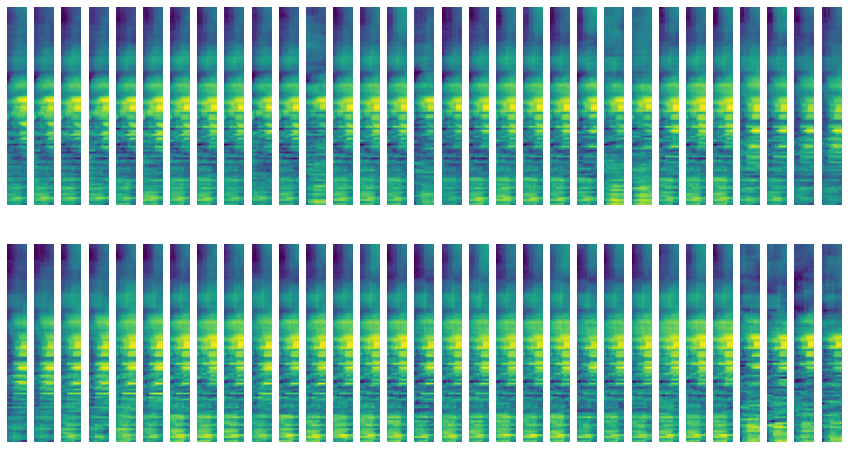

In [42]:
idx = 0
print('date:{}, rec:{}, time:{}, label:{}'.format(cases_wrong_5[0][0], cases_wrong_5[0][1], cases_wrong_5[0][1], cases_wrong_5[0][3]))
print('Original data 62 CH')
plt.figure(figsize=(15,8))
for i in range(62):
    weights_sub = cases_wrong_5[0][-1][i]
    plt.subplot(2,31,i+1)
    plt.axis('off')
    plt.imshow(weights_sub)
    # plt.clim(-0.03, 0.03)
plt.show()